In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

#matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

train_df = pd.read_json("./train.json.zip")
train_df.head()


,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low


In [2]:
test_df = pd.read_json("./test.json.zip")
print("Train Rows : ", train_df.shape[0])
print("Test Rows : ", test_df.shape[0])

Train Rows :  49352
Test Rows :  74659


In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74659 entries, 0 to 99999
Data columns (total 14 columns):
bathrooms          74659 non-null float64
bedrooms           74659 non-null int64
building_id        74659 non-null object
created            74659 non-null object
description        74659 non-null object
display_address    74659 non-null object
features           74659 non-null object
latitude           74659 non-null float64
listing_id         74659 non-null int64
longitude          74659 non-null float64
manager_id         74659 non-null object
photos             74659 non-null object
price              74659 non-null int64
street_address     74659 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 8.5+ MB


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
interest_level     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [5]:
test_df.latitude.max()

42.8727

C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


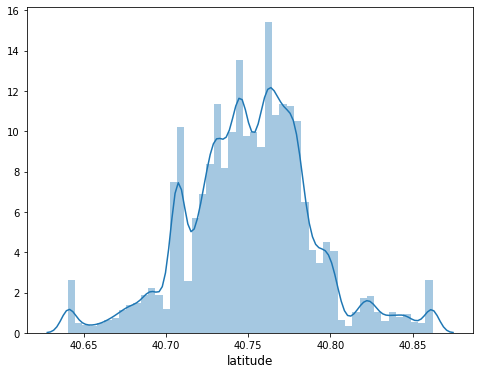

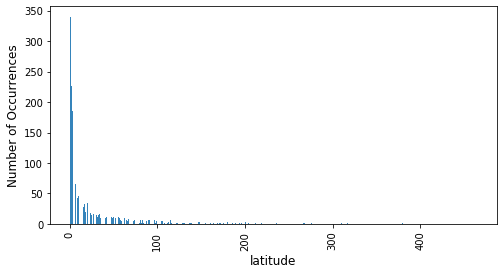

In [6]:
# latitude_srs = test_df['latitude'].value_counts()

llimit = np.percentile(train_df.latitude.values, 1)
ulimit = np.percentile(train_df.latitude.values, 99)
train_df['latitude'].ix[train_df['latitude']<llimit] = llimit
train_df['latitude'].ix[train_df['latitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=True)
plt.xlabel('latitude', fontsize=12)
plt.show()


#with outlier 
latitude_srs = test_df['latitude'].value_counts()
plt.figure(figsize=(8,4))
# sns.barplot(latitude_srs.index, latitude_srs.values, alpha=0.8, color=color[1])
plt.hist(latitude_srs.values, bins=1000,alpha=0.9)
# train_df.latitude.plot(kind='hist', bins=50000, color='c');
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('latitude', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


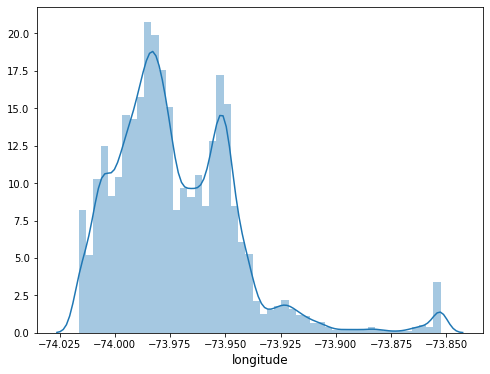

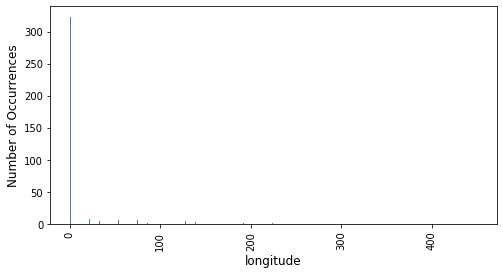

In [7]:
# longitude_srs = test_df['longitude'].value_counts()

llimit = np.percentile(train_df.longitude.values, 1)
ulimit = np.percentile(train_df.longitude.values, 99)
train_df['longitude'].ix[train_df['longitude']<llimit] = llimit
train_df['longitude'].ix[train_df['longitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, bins=50, kde=True)
plt.xlabel('longitude', fontsize=12)
plt.show()

#with outlier 
longitude_srs = test_df['longitude'].value_counts()
plt.figure(figsize=(8,4))
# sns.barplot(longitude_srs.index, longitude_srs.values, alpha=0.8, color=color[1])
plt.hist(longitude_srs.values, bins=10000,  alpha=0.9)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('longitude', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


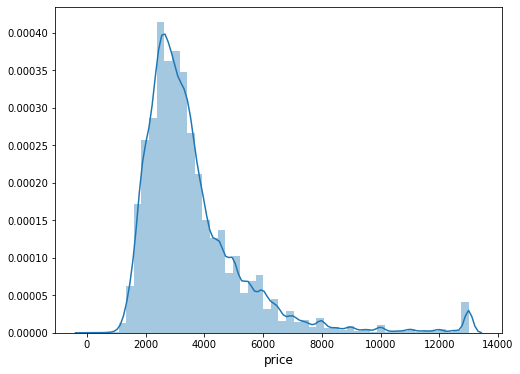

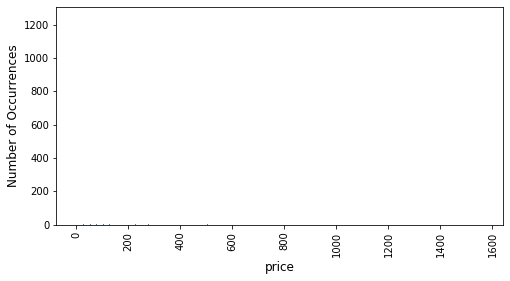

In [8]:
# price_srs = test_df['price'].value_counts()
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

#with outlier
price_srs = test_df['price'].value_counts()
plt.figure(figsize=(8,4))
# sns.barplot(price_srs.index, price_srs.values, alpha=0.8, color=color[1])
plt.hist(price_srs.values, bins=10000,  alpha=0.9)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('price', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

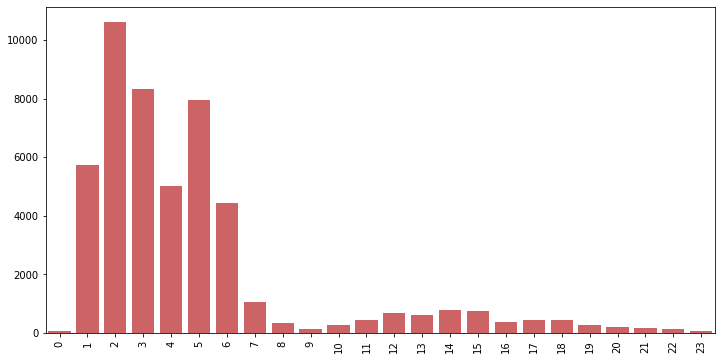

In [9]:
# train_df["hour_created"] = train_df["created"].dt.hour
# cnt_srs = train_df['hour_created'].value_counts()

# plt.figure(figsize=(12,6))
# sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
# plt.xticks(rotation='vertical')
# plt.show()


#hour-wise listing trend and find out the top 5 busiest hours of postings
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["hour_created"] = train_df["created"].dt.hour
cnt_srs = train_df['hour_created'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.show()

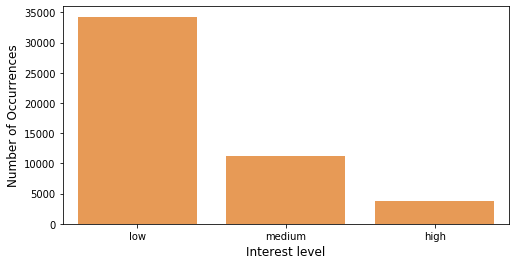

In [10]:
#show the proportion of target variable values

int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

In [11]:
#find out the missing value in every variable
train_df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
hour_created       0
dtype: int64

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,hour_created
100053,1.0,1,0,2016-04-19 03:36:28,"*Location: Thayer St. &amp; Broadway, Manhatta...",Thayer St,"[prewar, LOWRISE, EAT IN KITCHEN, SIMPLEX, HAR...",40.862047,6894111,-73.928000,ab15d581a04ed87b6f25d5aff8ddde30,[https://photos.renthop.com/2/6894111_571fa57d...,1695.0,98 Thayer St,low,3
100260,1.0,2,b195fee71945f39c55a28473cca2f305,2016-04-10 01:25:13,Rare two bedroom value on gorgeous Seaman Ave....,Seaman Avenue,[Pre-War],40.862047,6851019,-73.925100,1133f564d46b8a76c96857ad34fb4d16,[https://photos.renthop.com/2/6851019_de06c514...,1695.0,77-79 Seaman Avenue,high,1
100338,1.0,2,b86008baed0fd35adebb6637e5264d84,2016-04-06 04:36:37,Lovely 2 Bedroom 1 Bath apartment with hardwoo...,Vermilyea Avenue,"[Dishwasher, Hardwood Floors]",40.862047,6830764,-73.921700,b90228c187744e99a88c01c597bdc253,[https://photos.renthop.com/2/6830764_bc8b26f0...,2195.0,120 Vermilyea Avenue,low,4
100346,1.0,1,e9f8fbe6cce51fe5e4418e1828bc6546,2016-04-15 02:52:24,"When you choose Infinity, you'll move into an ...",201 Commons Park,"[Fitness Center, Outdoor Pool, Residents Loung...",40.862047,6875908,-73.852651,9df32cb8dda19d3222d66e69e258616b,[https://photos.renthop.com/2/6875908_34ef0687...,2195.0,201 Commons Park,low,2
100922,1.0,1,6fa1138b00d732f49f0433270215f951,2016-04-06 18:09:00,"MASSIVE s1-bedroom apartment in a well kept, c...",510 W 218th St,"[Cats Allowed, Laundry In Building]",40.862047,6835051,-73.914800,32396a0a600b721a4a7655d4ddcedc4d,[https://photos.renthop.com/2/6835051_25f7e1a7...,1500.0,510 W 218th St,high,18
101275,1.0,0,9146db779d273a1bf21c4d2694442e60,2016-04-06 06:40:26,Beautiful studio apartment with a spac...,2685 Creston Avenue,[Elevator],40.862047,6832401,-73.895200,12c0a30e296faa0dfd422fe918d7d4f4,[https://photos.renthop.com/2/6832401_16f58b51...,1250.0,2685 Creston Avenue,high,6
101540,1.0,0,5e4ab436aa1650631b0e1a961609637b,2016-04-28 06:10:31,BRAND NEW studio apartment. Gourmet kitchen eq...,Oxford Avenue,"[Elevator, Hardwood Floors, Dogs Allowed, Cats...",40.862047,6938470,-73.908800,18b801a90df27a4ea2452b1321a541ab,[],1495.0,3615 Oxford Avenue,medium,6
101859,1.0,1,9940dd41685d931927f6de04d739fb87,2016-04-15 03:34:14,This is a beautifully renovated one be...,219 E 196th Street,[],40.862047,6876669,-73.892000,12c0a30e296faa0dfd422fe918d7d4f4,[https://photos.renthop.com/2/6876669_5cf251cc...,1275.0,219 E 196th Street,high,3
101944,1.0,1,6fa1138b00d732f49f0433270215f951,2016-04-13 04:23:15,This is one of the nicest parts of Inwood near...,W 218 Street,[],40.862047,6865813,-73.914800,85eb675b4027c82bcc27b473c5eac646,[https://photos.renthop.com/2/6865813_ce1ad121...,1500.0,510 W 218 Street,high,4
102427,1.0,2,c85df93dea80fc73ac2832f9e734addd,2016-04-30 01:40:02,Two Bedroom apartment in a brand new building....,Fort Independence Street,"[Elevator, Parking, Roof-deck, Laundry Room]",40.862047,6944754,-73.898600,9cb28228fee3590c731ed33792a1172d,[https://photos.renthop.com/2/6944754_2733e238...,1850.0,3507 Fort Independence Street,high,1


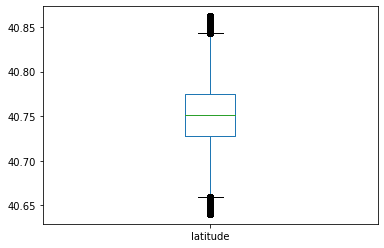

In [12]:
#outlier of latitude
train_df.latitude.plot(kind='box');
train_df.loc[train_df.latitude == train_df.latitude.max()]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,hour_created
100136,2.0,2,d56c66e65b6f75b412a8353d3d1f0f4c,2016-04-12 03:34:44,Oversized two bedroom/two bathroom (ma...,118th St,[],40.705900,6859368,-73.852651,fc3eb34da075c0a3835533f61f0851f9,[https://photos.renthop.com/2/6859368_5c3cf3ad...,2100.0,83-43 118th St,medium,3
100140,1.0,2,920cbea4c790314471335c3a64496c9e,2016-04-23 03:51:55,Check Out This Lovely Apartment Locate...,260th St,[],40.749300,6916033,-73.852651,17c1a97107fcbd846a1e16b576b450f6,[https://photos.renthop.com/2/6916033_06d6a6c7...,1900.0,74-21 260th St,medium,3
100221,1.0,2,878a9070fdefc740810986f8d1d91b0b,2016-04-16 04:10:58,Two Bedroom Gut Renovated Apartment. G...,65th Ave,[],40.730600,6883194,-73.852651,4c2d70526b6dce48b9785a2dbfd9d5a0,[https://photos.renthop.com/2/6883194_f5f4fec1...,2350.0,102-32 65th Ave,low,4
100282,2.0,3,c82902b9c1b239bfa38f406dddb5ee95,2016-04-19 04:27:18,"Feast Your Eyes On Fabulously 3 Br , 2...",23rd Ave,"[Cats Allowed, Dogs Allowed]",40.779600,6894530,-73.852651,a9a44735cc7189ed019a0d383eb6d1c9,[https://photos.renthop.com/2/6894530_ff05a016...,2000.0,210-28 23rd Ave,high,4
100346,1.0,1,e9f8fbe6cce51fe5e4418e1828bc6546,2016-04-15 02:52:24,"When you choose Infinity, you'll move into an ...",201 Commons Park,"[Fitness Center, Outdoor Pool, Residents Loung...",40.862047,6875908,-73.852651,9df32cb8dda19d3222d66e69e258616b,[https://photos.renthop.com/2/6875908_34ef0687...,2195.0,201 Commons Park,low,2
100391,1.0,1,0,2016-04-10 05:13:03,,83rd Avenue,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",40.711100,6853469,-73.852651,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6853469_75548f76...,1675.0,123-30 83rd Avenue,low,5
10048,1.0,0,7849031e50a43394e1d8b91b16ed4b14,2016-06-12 03:19:14,Gut renovated 2 rooms studio apartment locate...,34th Road,"[Elevator, Hardwood Floors, Dogs Allowed, Cats...",40.766300,7145794,-73.852651,d6cb3ffc17469f1cc679548165ef3af0,[https://photos.renthop.com/2/7145794_83deac0a...,1350.0,139-06 34th Road,high,3
101160,2.0,2,0,2016-04-04 01:11:48,PELHAM BAY Beauty offering spacious accommodat...,Middletown Road,[Fitness Center],40.844100,6819855,-73.852651,77575eb00fc09f61d55ea99b6c9cb845,[https://photos.renthop.com/2/6819855_928182b1...,2100.0,3030 Middletown Road,low,1
101230,1.0,1,fbb71d27c349843a570f9fe775bca7bb,2016-04-09 04:15:13,"Great Location, Convenient, Safe, Near Shops, ...",83rd Avenue,"[Doorman, Elevator, Laundry in Building, Dishw...",40.711800,6848897,-73.852651,331b0344fb543f42f3b75c60dbe1228a,[https://photos.renthop.com/2/6848897_cdee6086...,1695.0,123-60 83rd Avenue,medium,4
101310,1.0,2,9babefc1b361dac9c1c7ef651a4fd97a,2016-04-09 03:49:12,No Brokers FEE & 1 Month Free Gorgeous Renovat...,98-30 67th Ave.,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.728600,6848528,-73.852651,20ae02f6a3592ac6bcc4e1475aee9cd9,[https://photos.renthop.com/2/6848528_44d21460...,2700.0,98-30 67th Ave.,low,3


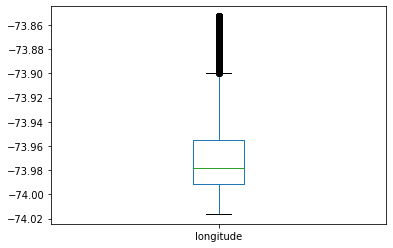

In [13]:
#outlier of longitude
train_df.longitude.plot(kind='box');
train_df.loc[train_df.longitude == train_df.longitude.max()]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,hour_created
100102,3.0,4,cd5dbf58ff7014957be69643a96aaaf5,2016-04-12 05:21:21,Ultimate luxury in the sky ! conv. 4 bedrooms ...,E 79,"[Swimming Pool, Roof Deck, Dining Room, Balcon...",40.7723,6860485,-73.9533,964dc31a872efa33fee9af11f62e843c,[https://photos.renthop.com/2/6860485_fbca719e...,13000.0,350 E 79,low,5
100203,3.5,4,27672509cffbf54c6202b2fc380078ad,2016-04-09 04:08:44,"Kitchens: GE Profile 36 Cook-top, Stainless St...",East 86th Street,"[Doorman, Laundry in Building, Laundry in Unit...",40.7788,6848778,-73.9538,d2bce61e0e0079ebdc8c281e415e045b,[https://photos.renthop.com/2/6848778_5ddddfc5...,13000.0,201 East 86th Street,low,4
100324,1.0,3,1890ad398d4903e6a03397d4f0385bc9,2016-04-15 04:32:14,Get one one month free on a 13 month lease! Th...,E 74 Street,"[Roof Deck, Balcony, Doorman, Elevator, Fitnes...",40.7681,6877550,-73.9527,11c00e995d6b314daa729b6ab9b9112c,[https://photos.renthop.com/2/6877550_c53515c7...,13000.0,501 E 74 Street,low,4
100457,2.5,3,62e083f461bbe2bdf7e4f7c866bbb4e2,2016-04-13 02:29:37,CooperCooper.com :: Listing ID #6AA.6001; Acce...,West 23rd Street,"[Doorman, Fitness Center, Pool, Elevator, Stor...",40.7425,6864115,-73.9926,6e5c10246156ae5bdcd9b487ca99d96a,[https://photos.renthop.com/2/6864115_ed8410ae...,13000.0,60 West 23rd Street,low,2
100694,3.0,3,4e026d5fd1bcd89b8d0e897bdb69a183,2016-04-14 05:26:29,"Brand new three bedroom, three bathroom 2000 s...",5th Ave.,"[Loft, Laundry in Unit, Dishwasher, Hardwood F...",40.7381,6872957,-73.9920,ad3d8ddc52c7e0859b5c6c7f7949c3bd,[https://photos.renthop.com/2/6872957_ec19537f...,13000.0,99 5th Ave.,low,5
100826,2.0,2,51591916a346a935268552c52186932f,2016-04-08 05:57:29,Be the first to live in this extraordinary apa...,W 64th St.,"[Swimming Pool, Roof Deck, Dining Room, Doorma...",40.7716,6844925,-73.9812,2ce4ad2a77bc8190427196ea1e8cfe4e,[https://photos.renthop.com/2/6844925_acc53926...,13000.0,20 W 64th St.,low,5
100833,3.0,3,84ababccac27ba73d403bd968d1f3bec,2016-04-07 05:34:51,Perfect UWS location near Central Park & Linco...,Broadway,"[Swimming Pool, Dining Room, Doorman, Elevator...",40.7725,6839398,-73.9819,aa9e353a6b43b125cbc89cb751090a9e,[https://photos.renthop.com/2/6839398_bb9765c4...,13000.0,1930 Broadway,low,5
101469,3.0,3,2c6b7b7999605f1c4c6faa496d243289,2016-04-03 02:56:26,"Amazing state of the art loft three bedroom, t...",Fifth Ave,"[Cats Allowed, Dogs Allowed, Elevator, Washer/...",40.7382,6818618,-73.9918,b20b0430544786cf2ee7b600543e76f6,[https://photos.renthop.com/2/6818618_a96c30fd...,13000.0,103 Fifth Ave,low,2
101768,4.5,4,cd5dbf58ff7014957be69643a96aaaf5,2016-04-25 02:46:36,"WOOD BURNING FIREPLACE, HIGHRISE CONVENIENCE W...",East 79th Street,"[Fireplace, Swimming Pool, Dining Room, Balcon...",40.7723,6921931,-73.9530,aa9e353a6b43b125cbc89cb751090a9e,[https://photos.renthop.com/2/6921931_77027412...,13000.0,350 East 79th Street,low,2
101812,3.0,3,29b949ddb15f5b570c7e993b2af95836,2016-04-02 05:46:06,Manhattan's true showcase addresses for Upper ...,East 84th Street,"[Swimming Pool, Elevator, Fitness Center]",40.7754,6816207,-73.9502,7e77f82ffcd8bfadad6e14d1e1c13ab0,[],13000.0,400 East 84th Street,low,5


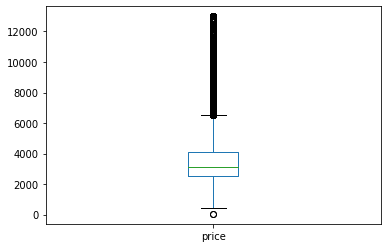

In [14]:
#outlier of latitude
train_df.price.plot(kind='box');
train_df.loc[train_df.price == train_df.price.max()]

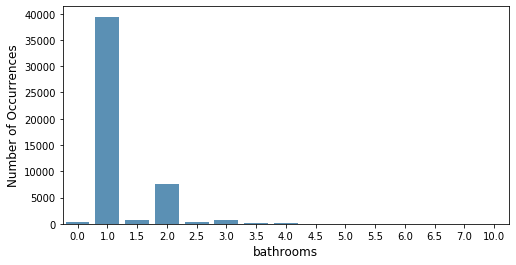

In [15]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

In [16]:

# import os
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage.io import imread, imshow
# from skimage.filters import prewitt_h,prewitt_v
# from fnmatch import fnmatch

# import matplotlib.image as mpimg 
# import matplotlib.pyplot as plt 
  
# # Read Images 
# # img = mpimg.imread('images_sample/6812263_f915711a0a6ed454d8651a04115a0b06.jpg') 
  
# # # Output Images 
# # plt.imshow(img) 
# # images = cv2.imread('images_sample/6812263/6812263_f915711a0a6ed454d8651a04115a0b06.jpg')
# # cv2.imshow('image', images)

# # Set the directory you want to start from
# rootDir = 'images_sample'
# pattern = "*.jpg"
# for dirName, subdirList, fileList in os.walk(rootDir):
#     print('Found directory: %s' % dirName)
#     for fname in fileList:
#         if fnmatch(fname, pattern):
#             fnamepath = dirName+'/'+fname
#             print('\t%s' % fnamepath)
#             fnamenew = imread(fnamepath, as_gray=True)
#             imshow(fnamenew)
#             #print(fnamenew)
#             print(fnamenew.shape)
#             #calculating horizontal edges using prewitt kernel
#             edges_prewitt_horizontal = prewitt_h(fnamenew)
#             #calculating vertical edges using prewitt kernel
#             edges_prewitt_vertical = prewitt_v(fnamenew)
            

ModuleNotFoundError: No module named 'cv2'

In [17]:
train_df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,hour_created
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.714500,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000.0,792 Metropolitan Avenue,medium,7
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.794700,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465.0,808 Columbus Avenue,low,12
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.738800,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850.0,241 W 13 Street,high,3
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.753900,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275.0,333 East 49th Street,low,2
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.824100,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350.0,500 West 143rd Street,low,1
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],40.742900,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995.0,350 West 18th Street,medium,4
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",40.801200,6930771,-73.9660,01287194f20de51872e81f660def4784,[https://photos.renthop.com/2/6930771_7e3622b6...,3600.0,210 West 107th Street,low,3
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",40.742700,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6867392_b18283f6...,5645.0,155 West 21st Street,low,6
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",40.823400,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725.0,63 Hamilton Terrace,medium,2
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",40.727800,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800.0,522 E 11th,low,2
